# Cross-Testing: Imbalanced-Trained Model on Balanced Data
This notebook loads the model trained on imbalanced data and evaluates it on the balanced, lemmatized dataset for robustness validation.

In [44]:
import pandas as pd
import joblib

# Paths and column names
BALANCED_LEMMA_PATH = r"D:\Projects\automated-review-rating-system\data\cleaned_dataset\balanced_data_lemmatized.csv"
MODEL_PATH = "model_B_imbalanced.pkl"
VECTORIZER_PATH = "vectorizer_model_B.pkl"
REVIEW_COL = "Text"
LEMMATIZED_COL = "lemmatized_text"
LABEL_COL = "Score"

# Load balanced, lemmatized data
df_balanced = pd.read_csv(BALANCED_LEMMA_PATH)
df_balanced.head()


,Text,lemmatized_text,Score
0,i keep this in my regular rotation of keurig b...,i keep this in my regular rotation of keurig b...,4
1,now that this is made in mexico it s much swee...,now that this is made in mexico it s much swee...,3
2,these are not as described these are not the c...,these are not a described these are not the ch...,1
3,disappointed in the product overly expensive a...,disappointed in the product overly expensive a...,3
4,i use this lemon oil to add a few drops to my ...,i use this lemon oil to add a few drop to my d...,3


## Load Imbalanced-Trained Model & Vectorizer
Load the pre-trained Logistic Regression model and its associated TF-IDF vectorizer.

In [45]:
model = joblib.load(MODEL_PATH)
vectorizer = joblib.load(VECTORIZER_PATH)


## Prepare Features and Labels for Cross-Testing
Extract TF-IDF features using the **same vectorizer instance** and get ground-truth labels.

In [46]:
X_cross = df_balanced[LEMMATIZED_COL]
y_cross = df_balanced[LABEL_COL]

# Transform using the existing vectorizer
X_cross_vec = vectorizer.transform(X_cross)


## Cross-Validation: Predict & Evaluate

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_cross_pred = model.predict(X_cross_vec)

print("Cross-Test Accuracy:", accuracy_score(y_cross, y_cross_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_cross, y_cross_pred))
print("\nClassification Report:\n", classification_report(y_cross, y_cross_pred))


Cross-Test Accuracy: 0.3861

Confusion Matrix:
 [[ 675  398  419  257  251]
 [ 277  416  651  438  218]
 [ 145  300  742  602  211]
 [  68   80  440  935  477]
 [  75   69  217  546 1093]]

Classification Report:
               precision    recall  f1-score   support

           1       0.54      0.34      0.42      2000
           2       0.33      0.21      0.25      2000
           3       0.30      0.37      0.33      2000
           4       0.34      0.47      0.39      2000
           5       0.49      0.55      0.51      2000

    accuracy                           0.39     10000
   macro avg       0.40      0.39      0.38     10000
weighted avg       0.40      0.39      0.38     10000



## Confusion Matrix Visualization

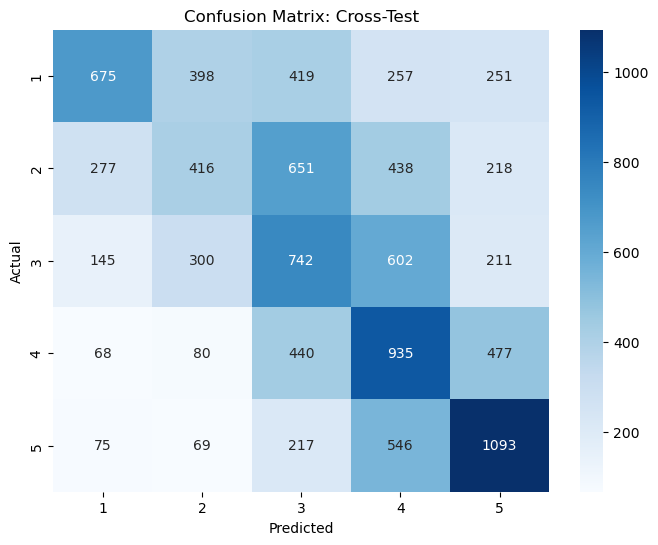

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = sorted(df_balanced[LABEL_COL].unique())
cm = confusion_matrix(y_cross, y_cross_pred, labels=labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Cross-Test")
plt.show()
